<a href="https://colab.research.google.com/github/FerdousJUST/Fish-classification-part-2/blob/main/Fish_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [70]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline

In [57]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [71]:
from keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1/255)
train_fed = rescaled.flow_from_directory('/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training',target_size=(128,128),batch_size=32,class_mode= 'categorical') 
test_fed = rescaled.flow_from_directory('/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation',target_size=(128,128),batch_size=32,class_mode= 'categorical')
    

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [72]:
from tensorflow.keras.layers import Input,Flatten,Dense,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [73]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,kernel_size=(3,3),activation = 'relu',input_shape = (128,128,3)),
                                    tf.keras.layers.MaxPool2D(2,2),tf.keras.layers.BatchNormalization(),
                                    
                                    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),tf.keras.layers.BatchNormalization(),

                                    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),tf.keras.layers.BatchNormalization(),

                                    tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),tf.keras.layers.BatchNormalization(),

                                    tf.keras.layers.Conv2D(256,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),tf.keras.layers.BatchNormalization(),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(128,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(256,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.1),
                                    
                                    tf.keras.layers.Dense(4,activation = 'softmax')
                                    ])

In [74]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 63, 63, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                      

In [75]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [76]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [77]:
erl_stop = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights=True)
mod_chk = ModelCheckpoint(filepath='/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/my_model.hdf5',monitor = 'val_loss',save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 3,factor = 0.1)

In [78]:
hist = model.fit_generator(train_fed, shuffle = True, epochs=10, validation_data=test_fed,
                           callbacks = [erl_stop,mod_chk,lr_rate],verbose = 2
                           )

<ipython-input-78-da3407ffa4b4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_fed, shuffle = True, epochs=10, validation_data=test_fed,


Epoch 1/10
150/150 - 133s - loss: 0.4328 - accuracy: 0.8425 - val_loss: 1.6370 - val_accuracy: 0.5500 - lr: 0.0010 - 133s/epoch - 887ms/step
Epoch 2/10
150/150 - 124s - loss: 0.1962 - accuracy: 0.9350 - val_loss: 0.3191 - val_accuracy: 0.8917 - lr: 0.0010 - 124s/epoch - 823ms/step
Epoch 3/10
150/150 - 122s - loss: 0.1051 - accuracy: 0.9627 - val_loss: 0.3447 - val_accuracy: 0.8667 - lr: 0.0010 - 122s/epoch - 817ms/step
Epoch 4/10
150/150 - 127s - loss: 0.0906 - accuracy: 0.9692 - val_loss: 2.0515 - val_accuracy: 0.5633 - lr: 0.0010 - 127s/epoch - 844ms/step
Epoch 5/10
150/150 - 124s - loss: 0.0637 - accuracy: 0.9783 - val_loss: 1.1794 - val_accuracy: 0.7258 - lr: 0.0010 - 124s/epoch - 825ms/step


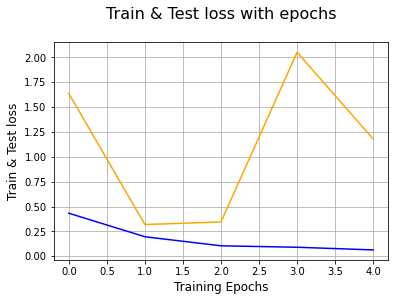

In [79]:
plt.plot(hist.history['loss'],color = 'blue',label = 'train')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'train')
plt.grid(True)
plt.title("Train & Test loss with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test loss",fontsize =12)
plt.show()

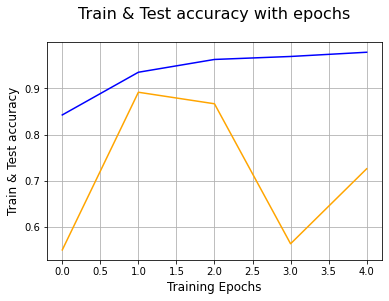

In [80]:
plt.plot(hist.history['accuracy'],color = 'blue',label = 'train')
plt.plot(hist.history['val_accuracy'],color = 'orange',label = 'train')
plt.grid(True)
plt.title("Train & Test accuracy with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test accuracy",fontsize =12)
plt.show()

In [81]:
acc = model.evaluate(test_fed,steps = len(test_fed),verbose = 2)
print('%.2f'%(acc[1]*100))

38/38 - 13s - loss: 0.3191 - accuracy: 0.8917 - 13s/epoch - 351ms/step
89.17


In [16]:
from sklearn.metrics import confusion_matrix

In [48]:
import cv2

In [49]:
test_image = cv2.imread('/content/hilsha_fish_01.jpg')

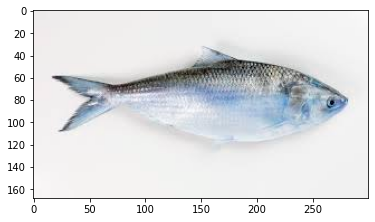

In [50]:
plt.imshow(test_image)

In [51]:
test_image.shape

(168, 300, 3)

In [52]:
test_image = cv2.resize(test_image,(128,128))

In [54]:
test_input = test_image.reshape((1,128,128,3))